In [1]:
from typing import Callable, Tuple 


# Non-linear functions are types that take 
# a float and return a float.
NonLinearFunction = Callable[[int], int]

# Helper Functions
def sign_of(number) -> int:
    if number == 0:
        return 0
    elif number < 0:
        return -1
    elif number > 0:
        return 1

# Solutions to Non-Linear Equations

Numerical methods for solving non-linear equations can be broadly divided into two:

1. Bracketing Methods
2. Open Methods

## 1.1 Bracketing Methods

Bracketing methods start with an *interval* that contains the root and a procedure is used to obtain a smaller interval containing the root.

Examples of Bracketing methods:
- Bisection Method
- False position method (Regula-Falsi)

### 1.1.1 Bisection Method (or Interval Halving)

In the bisection method you are given the two numbers that represent an interval on the x-axis of the number line that contains the root.

```
           interval_midpoint
                   |
  interval_start   ↓   interval_end 
          ⬤-----------------⬤
-∞       -3 -2  -1   0   1   2   3       +∞
 └┴┴┴┴┴─┴─┴──┴───┴───┴───┴───┴───┴─┴─┴┴┴┴┘ 
```

#### Assumptions of the Bisection Method
Given a function $f(x)$ and an interval $[interval\_start,  interval\_end]$.
- $f(x)$ is continuous on the interval.
- The sign of $f(interval\_start)$ and $f(interval\_end)$ are different
  (i.e $f(interval\_start) \times f(interval\_end)$)

#### Algorithm of the Bisection Method

1. At each iteration you evaluate the value of the function at:
    - The start of the interval, $interval\_start$
    - The end of the interval, $interval\_end$
    - And, the midpoint of the interval, $interval\_midpoint$

2. Adjust the values of $interval\_start$ and $interval_end$ using the following rule:
    - If the value of the function at $interval\_midpoint$ has the *<ins>same sign</ins>* as $interval\_start$, then the new interval is: $[interval\_midpoint, interval\_end]$.

    - If the value of the function at $interval\_midpoint$ has the *<ins>same sign</ins>* as $interval\_end$, then the new interval is: $[interval\_start, interval\_midpoint]$

#### Best Estimate and Error Level

The best estimate of the root of the equation is the mid point of the interval.

  $Estimate \space of \space the \space zero: r = \frac{b + a}{2}$

Using the midpoint of the interval as an estimate the error is given by:

$Error \leq \frac{b - a}{2}$



#### Convergence Analysis of Bisection Method
$n \leq \frac{log(b-a) - log(\epsilon)}{log(2)}$

Where:

- $n$: The number of iterations.
- $[a, b]$: The interval of the containing the root.
- $\epsilon$: The acceptable error (specified as an absolute error).


In [2]:
# This is a verbose example to explain the concepts

def bisection_method(
    function: NonLinearFunction,
    interval: Tuple[float, float],
    iteration_limit: int,
) -> float:

    # Check that the interval has two different errors at both sides
    (interval_start, interval_end) = interval
    assert sign_of(function(interval_start)) != sign_of(function(interval_end))


    # Create table for pretty-printing.
    print(f"| Start    | Midpoint | End      |")
    print(f"==================================")

    for _ in range(iteration_limit):
        interval_midpoint = (interval_start + interval_end) / 2

        # Log the interval values
        print(f"| {interval_start:.6f} | {interval_midpoint:.6f} | {interval_end:.6f} |")

        # Get the value of the function at the interval's
        # start, end and midpoint.
        value_at_interval_start: float = function(interval_start)
        value_at_interval_end: float = function(interval_end)
        value_at_interval_midpoint: float = function(interval_midpoint)


        # If we found the exact root return early.
        if value_at_interval_midpoint == 0:
            return interval_midpoint

        elif sign_of(value_at_interval_start) == sign_of(value_at_interval_midpoint):
            # If the sign of the midpoint is the same as the sign at the 
            # start of the interval, the midpoint becomes the new interval start
            interval_start = interval_midpoint
            
        elif sign_of(value_at_interval_end) == sign_of(value_at_interval_midpoint):
            # If the sign of the midpoint is the same as the sign at the
            # end of the interval, the midpoint becomes the new interval end. 
            interval_end = interval_midpoint

    # Once we've exceeded the iteration limit return whatever is the
    # midpoint of the interval
    interval_midpoint = (interval_start + interval_end) / 2
    return interval_midpoint



Testing out our code:

| Start    | Midpoint | End      |
| 0.000000 | 1.500000 | 3.000000 |
| 1.500000 | 2.250000 | 3.000000 |
| 1.500000 | 1.875000 | 2.250000 |
| 1.875000 | 2.062500 | 2.250000 |
| 1.875000 | 1.968750 | 2.062500 |
| 1.968750 | 2.015625 | 2.062500 |
| 1.968750 | 1.992188 | 2.015625 |
| 1.992188 | 2.003906 | 2.015625 |
| 1.992188 | 1.998047 | 2.003906 |
| 1.998047 | 2.000977 | 2.003906 |
| 1.998047 | 1.999512 | 2.000977 |
| 1.999512 | 2.000244 | 2.000977 |
| 1.999512 | 1.999878 | 2.000244 |
| 1.999878 | 2.000061 | 2.000244 |
| 1.999878 | 1.999969 | 2.000061 |
| 1.999969 | 2.000015 | 2.000061 |
| 1.999969 | 1.999992 | 2.000015 |
| 1.999992 | 2.000004 | 2.000015 |
| 1.999992 | 1.999998 | 2.000004 |
| 1.999998 | 2.000001 | 2.000004 |


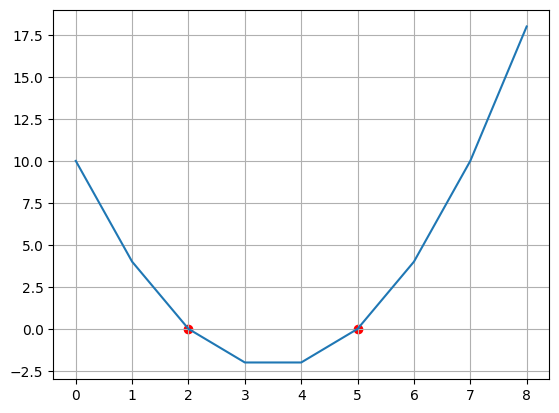

In [5]:
func_1 = lambda x: (x**2) - x - 2

root = bisection_method(
    function = func_1,
    interval = (0, 3),
    iteration_limit = 20,
)

import matplotlib.pyplot as plt

plt.grid()
plt.plot(
    list(map(func_1, range(-3, 6)))
)
plt.scatter(2, 0, color="red")
plt.scatter(5, 0, color="red")


In [4]:
# Simple version

def bisection_method_simple(
    f: NonLinearFunction,
    interval: Tuple[float, float],
    iteration_limit: int,
) -> float:
    (a, b) = interval
    for _ in range(iteration_limit):
        c = (a+b) / 2
        f_a = f(a)
        f_b = f(b)
        f_c = f(c)

        if sign_of(f_c) == sign_of(f_a):
            a = c
        elif sign_of(f_c) == sign_of(f_b):
            b = c
        elif f_c == 0:
            return c

    return (a+b) / 2